# Deisgn of AI systems

In this assignment, we built a simple word translator using the same logic that was used when Google built their first version of translate. Further information can be found in "2 Implementing a Machine Translation System" in the pdf document.

## Assignment 4, Eric Johansson & Max Sonnelid

In [104]:
import pandas as pd
import numpy as np
import os
import collections
from collections import Counter

In [105]:
sv_en_file = 'data/europarl-v7.sv-en.lc.en'
fr_en_file = 'data/europarl-v7.fr-en.lc.en'
de_en_file = 'data/europarl-v7.de-en.lc.en'

de_file = 'data/europarl-v7.de-en.lc.de'
sv_file = 'data/europarl-v7.sv-en.lc.sv'
fr_file = 'data/europarl-v7.fr-en.lc.fr'


In [106]:
#files = [sv_en_file, fr_en_file, de_en_file, de_file, sv_file, fr_file]
files = [sv_en_file, de_file, sv_file, fr_file]

In [107]:
# Creating a method that reads the files
def read_file(file):
    with open(file, "r", encoding="utf-8") as f:
        return f.read()

In [108]:
all_text = []
for file in files:
    temp = read_file(file)
    temp = temp.split()
    all_text = all_text + temp

In [109]:
countries = ['English', 'German', 'Swedish', 'French']
i = 0
for file in files:
    words = read_file(file)
    listOfWords = words.split()
    counter = Counter(listOfWords)
    print(f"Most common words in {countries[i]}: ")
    print(counter.most_common(10))
    i+=1

Most common words in English: 
[('the', 19322), (',', 13514), ('.', 9774), ('of', 9312), ('to', 8801), ('and', 6946), ('in', 6090), ('is', 4400), ('that', 4357), ('a', 4269)]
Most common words in German: 
[(',', 18549), ('die', 10521), ('.', 9733), ('der', 9374), ('und', 7028), ('in', 4175), ('zu', 3168), ('den', 2976), ('wir', 2863), ('daß', 2738)]
Most common words in Swedish: 
[('.', 9648), ('att', 9181), (',', 8876), ('och', 7038), ('i', 5949), ('det', 5687), ('som', 5028), ('för', 4959), ('av', 4013), ('är', 3840)]
Most common words in French: 
[('&apos;', 16729), (',', 15402), ('de', 14520), ('la', 9746), ('.', 9734), ('et', 6619), ('l', 6536), ('le', 6174), ('les', 5585), ('à', 5500)]


In [110]:
#Checking a list consisting of four languages

lenght = len(all_text)
counter_all = Counter(all_text)
occurence = counter_all['zebra']
prob = occurence/lenght
print(f"Probability of zebra:{prob}")

occurence2 = counter_all['speaker']
prob2 = occurence2/lenght
print(f"Probability of speaker:{prob2}")

Probability of zebra:0.0
Probability of speaker:8.854784195626977e-06


## Task 2b

In [111]:
string = 'hej jag heter eric och jag heter inte eric'

In [119]:
swe = read_file(sv_file)
eng = read_file(sv_en_file)

In [112]:
## Create bigrams of a sentence

def bigrams (sentence):
    bigrams = [[]]*0
    words = sentence.split()
    for i in range(0,len(words)-1):
        bigrams.append((words[i],words[i+1]))
    
    return bigrams


In [113]:
### Test of bigrams method

arr = bigrams(string)
print(arr)
count_arr = Counter(arr)
count_arr['jag','heter']

[('hej', 'jag'), ('jag', 'heter'), ('heter', 'eric'), ('eric', 'och'), ('och', 'jag'), ('jag', 'heter'), ('heter', 'inte'), ('inte', 'eric')]


2

In [121]:
def probability(bigram, string):
    count_bigr = Counter(bigrams(string))
    string = string.split()
    count_string = Counter(string)
    if (count_string[bigram[0]]==0):
        return 1/100000000
    if (count_bigr[bigram[0],bigram[1]]==0):
        return 1/100000000

    return count_bigr[bigram[0],bigram[1]]/count_string[bigram[0]]

In [122]:
sv_en = read_file(sv_en_file)
sv_dict = read_file(sv_file)
probability(['clean','supply'], sv_en)

0.0625

In [14]:
## Calculating the probability of a sentence based on a long text document.

def finalPred(sentence, longString):
    bigrams_array = bigrams(sentence)
    if (len(bigrams_array)==0):
        raise ValueError('You need at least two words in order to create a bigram')

    prob = 1
    for bigr in bigrams_array:
        prob = prob * probability(bigr,longString)

    return prob

In [116]:
finalPred('he development of this directive has been difficult and complex',eng)

4.0087570976878654e-22

In [156]:
finalPred('thiswordisnotpresent intheoriginaltext', eng)

1e-08

In [118]:
finalPred('i am', eng)

0.11336032388663968

## Task 2c

In [123]:
# Comparing the different langugages to see if the sentences are matching

i = 4
swe_sentence = swe.splitlines()
#swe_sentence = swe_sentence[0:100]
print(swe_sentence[i])

eng_sentence = eng.splitlines()
#eng_sentence = eng_sentence[0:30]
print(eng_sentence[i])

jag ber er resa er för en tyst minut .
please rise , then , for this minute &apos; s silence .


In [124]:
## EM algorithm

import collections

def finalMethod(lang1_arr, lang2_arr, iterations):
    t = collections.defaultdict(lambda: collections.defaultdict(lambda:0.01))

    for i in range(iterations):
        soft_counts_duo = collections.defaultdict(lambda: collections.defaultdict(lambda:0))
        soft_count_single = collections.defaultdict(float)
        sum_count = collections.defaultdict(float)

        for i in range(0,len(lang1_arr)):
            lang1_words = lang1_arr[i].split()
            lang2_words = lang2_arr[i].split()

            lang2_words.insert(0,"NULL")

            for w1 in lang1_words:
                sum_count[w1] = 0 
                for w2 in lang2_words:
                    sum_count[w1] = sum_count[w1] + t[w1][w2]

            for w1 in lang1_words:
                for w2 in lang2_words:
                    numerator = t[w1][w2]
                    denominator = sum_count[w1]
                    delta = numerator/denominator
                    soft_counts_duo[w2][w1] = soft_counts_duo[w2][w1] + delta
                    soft_count_single[w2] =  soft_count_single[w2] + delta
        
        for w2 in soft_counts_duo.keys():
            for w1 in soft_counts_duo[w2].keys(): 
                if (soft_count_single[w2]==0):
                    t[w1][w2]=0
                else: 
                    t[w1][w2] = soft_counts_duo[w2][w1]/ soft_count_single[w2]

    return t
            

            

In [141]:
t = finalMethod(swe_sentence, eng_sentence, 5)

In [126]:
#Calculated the most possible translations of european

def most_probable_translation(word, t):
    result = []
    for w in t:
        prob = t[w][word]
        result.append((w, prob))

    df = pd.DataFrame(result,columns=['Word', 'Prob'])
    df = df.sort_values(by='Prob', ascending=False)
    return df.iloc[0][0]


In [127]:
print(most_probable_translation("parliament",t))

parlamentet


In [153]:
# Creating an array containing t for different numbers of T (nr of iterations when training t)
iterations = [1, 2, 5, 10, 15, 20]
t2 = []
for it in iterations:
    temp = finalMethod(swe_sentence, eng_sentence, it)
    t2.append(temp)


In [154]:
# Comparing the output from different t
accuracy = []
proposedWords= []
for i in range(0,6):
    result = []
    for w in t2[i]:
        prob = t2[i][w]["european"]
        result.append((w, prob))

    df = pd.DataFrame(result,columns=['Word', 'Prob'])
    df = df.sort_values(by='Prob', ascending=False)
    accuracy.append(df.iloc[0][1])
    proposedWords.append(df)

In [162]:
for i in range(0,6):
    print(f"Proposed translation of europe after {iterations[i]} iterations")
    print(proposedWords[i].head(10))
    print(' ')

Proposed translation of europe after 1 iterations
          Word      Prob
10           .  0.035910
59           ,  0.033725
21         att  0.033325
19         och  0.028216
39           i  0.027026
70  europeiska  0.025972
77         det  0.020549
64         för  0.019566
27         som  0.018687
24          en  0.017656
 
Proposed translation of europe after 2 iterations
          Word      Prob
70  europeiska  0.167560
10           .  0.051114
59           ,  0.047114
21         att  0.044937
39           i  0.043946
19         och  0.040991
24          en  0.028060
64         för  0.027457
71     unionen  0.027110
77         det  0.027011
 
Proposed translation of europe after 5 iterations
                   Word      Prob
70           europeiska  0.676670
1054          europeisk  0.049645
39                    i  0.027277
10                    .  0.019682
7                   den  0.019174
59                    ,  0.019068
21                  att  0.016855
19                  och 

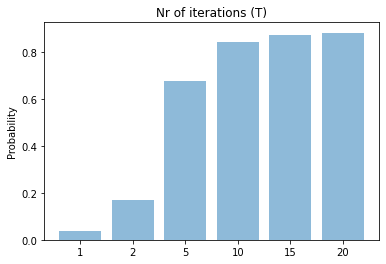

In [138]:
import matplotlib.pyplot as plt

y_pos = np.arange(len(iterations))
plt.bar(y_pos, accuracy, align='center', alpha=0.5)
plt.xticks(y_pos, iterations)
plt.ylabel('Probability')
plt.title('Nr of iterations (T)')

plt.show()

In [139]:
import itertools

def decoder(sentence):
    words = sentence.split()
   # no_words = len(words)
    translations = [[]]*0
    #no_bigrams = len(words)

    for word in words:
        translations.append(most_probable_translation(word,t))
    
    #bigrams = all_possible_bigrams(translations)

    return translations

def all_possible_sentences2(words):

    temp = list(itertools.permutations(words, len(words)))
    res = []

    for sent in temp:
        str_temp =" ".join(sent)
        res.append(str_temp)
    return res

def most_probable_sentence(sentences, longString):

    max_prob = 0
    max_sent = ""

    for sent in sentences:
        #print(sent)
        prob = finalPred(sent, longString)
        #print(prob)
        if (max_prob < prob):
            max_prob = prob
            max_sent = sent
    
    return max_sent, max_prob

def translator(sentence, target_language_dictionary):
    decode = decoder(sentence)
    sentences = all_possible_sentences2(decode)
    result = most_probable_sentence(sentences,target_language_dictionary)
    if (result[1]==0):
        raise ValueError('No feasible translation found')
    return result


In [148]:
translator('i declare that', swe)

('förklarar att jag', 0.001960570743927677)

In [147]:
translator('i love dogs', swe)

('jag kärleken hundar', 1.0000000000000001e-16)

In [157]:
translator('science is fun', swe)

('vetenskap är roligt', 2.6041666666666666e-12)

In [155]:
translator('this is a sentence from europe', swe)

('från detta europa är en struktur', 2.979268607148214e-11)